# Model Analytics & the Science of Predictive Modeling
## Model Evaluation and Visualizing Model Performance


Spring 2018 - Profs. Foster Provost and Josh Attenberg

Teaching Assistant: Apostolos Filippas


***

In [1]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
import sys

import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
plt.rcParams['figure.figsize'] = 10, 8

sys.path.append("..")

# tools for loading a few toy datasets
from ds_utils.sample_data import *

### True Positives and True Negatives

Beyond accuracy, one of the most concepts most commonly encountered when discussing the performance of a predictive model is the notion of True Positives (Examples in the 1's class that were predicted to be 1) and True Negatives (Examples in the 0's class that were predicted to be 0's). Along with these, one is often interested in False Positives (Examples that were predicted to belong to the 1's class but actually belong to 0), and False Negatives (Examples predicted to be in the 0's class but actually belong to 1). 

### Confusion matrices
A confusion matrix is simply the matrix deliniating counts of true positives, true negatives, false positives and false negatives. By convention in this course, we'll enumerate different possible predictions on different rows, and different true labels on different columns. 

**Important and overlooked (always remember this!):** a confusion matrix is defined with respect to a classifier, not a scoring model (e.g., a class-probability estimation model).  Our models *are* scoring models.  So the confusion matrices are defined with respect a scoring model plus a *threshold* on the score.  The threshold should be chosen carefully, and with the business need in mind.   For binary classes, the default for most modeling programs when they return a predicted classification is to use a threshold corresponding to an estimated class probability of 0.5.  This is because the modeling program does not know the business setting, and 0.5 makes sense as a default (in expectation it gives the maximum classification accuracy, if the probabilities are well calibrated).


Remember, a confusion matrix looks like:

```
  |____________ p __________|___________ n ___________|
Y | 1's predicted to be 1's | 0's predicted to be 1's |
N | 1's predicted to be 0's | 0's predicted to be 0's |
```

Let's build a confusion matrix using a logistic regression model. 


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# car data from before just as a toy example
X, Y = get_car_data()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75, test_size=.25)

# Make and fit a model on the training data
model = LogisticRegression(C=1)
model.fit(X_train, Y_train)

# Get probabilities of being a (We saw this last class !!)
predictions = model.predict(X_test)

In [3]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(Y_test, predictions, labels=[1, 0]).T

# "pretty print" the confusion matrix
confusion_matrix_one = pd.DataFrame(conf_matrix, columns=['p', 'n'], index=['Y', 'N'])

confusion_matrix_one

,p,n
Y,47,6
N,3,42


### As probabilities

In [4]:
conf_matrix_probs = conf_matrix/float(conf_matrix.sum())
confusion_matrix_one_probs = pd.DataFrame(conf_matrix_probs, columns=['p', 'n'], index=['Y', 'N'])

confusion_matrix_one_probs

,p,n
Y,0.479592,0.061224
N,0.030612,0.428571


### True Positive Rate, False Positive Rate

True positive rate (TPR) is the percentage examples that are predicted to be 1 that are actually 1. False positive rate False positive rate is the percentage of 0 examples that were predicted to be 0. True negative rate (TNR) and false negative rate (FNR) are defined similarly.

* $ TPR = \frac{TP}{TP + FN} $
* $ FPR = \frac{FP}{FP + TN} $
* $ TNR = \frac{TN}{TN + FP} $
* $ FNR = \frac{FN}{TP + FN} $

In [5]:
# divide by row sums
tpr_fpr_fnr_fpr = conf_matrix/conf_matrix.sum(axis=0, keepdims=True).astype(float)
print (tpr_fpr_fnr_fpr)

[[0.94  0.125]
 [0.06  0.875]]


### Precision and Recall

Two other important metrics that are derived from the confusion matrix are precision and recall. Precision is the percentage of examples predicted to be 1 that are actually 1. Recall is the percentage of 1 examples that were predicted to be 1. Note that recall is the same thing as true positive rate!

* $\text{precision} = \frac{TP}{TP + FP}$
* $\text{recall} = \frac{TP}{TP + FN} $

In [6]:
# sklearn has handy built-ins for these,
# but they could easily be computed from the confusion matrix
precision = metrics.precision_score(Y_test, predictions)
recall = metrics.recall_score(Y_test, predictions)

print ("precision: %0.3f, recall: %0.3f" % (precision, recall))

precision: 0.887, recall: 0.940


### Another Example

The next example uses data from a real direct marketing campaign. Each record represents an individual who was targeted with a direct marketing offer. The offer was a solicitation to make a charitable donation. The features for each example represent various features related to an individual's financial data and prior donation activity, the target y value is 1 if the person responded to the mailer, and 0 otherwise.

In [7]:
X, Y = get_mailing_data()
X_mailing_train, X_mailing_test, Y_mailing_train, Y_mailing_test = train_test_split(X, Y, train_size=.75, test_size=.25)

# Make and fit a model on the training data
model_mailing = LogisticRegression(C=10000)
model_mailing.fit(X_mailing_train, Y_mailing_train)

# Get probabilities of being a (We saw this last class !!)
probabilities = model_mailing.predict_proba(X_mailing_test)[:, 1]

# default decision threshold
prediction = probabilities > 0.5

mailing_conf_matrix_one = metrics.confusion_matrix(Y_mailing_test, prediction, labels=[1, 0]).T
confusion_matrix_large = pd.DataFrame(mailing_conf_matrix_one,
                                      columns=['p', 'n'], index=['Y', 'N'])
confusion_matrix_large

,p,n
Y,0,0
N,2504,45441


Wait -- take a close look at that.  What's going on?

Incidentally, what would be the classification accuracy?

-

-

-

-

-


In [8]:
probabilities[:5]

array([0.04258064, 0.06427723, 0.03525064, 0.08530882, 0.04307753])

What if we lower the threshold to 5%?

In [9]:
# Let's move the threshold down
prediction = probabilities > 0.05

mailing_conf_matrix_two = metrics.confusion_matrix(Y_mailing_test, prediction, labels=[1, 0]).T
# Build and print a confusion matrix
confusion_matrix_small = pd.DataFrame(mailing_conf_matrix_two,
                                      columns=['p', 'n'], index=['Y', 'N'])
print (confusion_matrix_small)

      p      n
Y  1433  17843
N  1071  27598


(Incidentally, what would be the classification accuracy now?)


### Expected Cost, Expected profit

Often in business, TP's FP's TN's and FN's have differing costs or benefits. If these can be encoded, they can be used to evaluate the quality of a classification model. Let's say that sending our mailing costs 1 dollar. If someone responds to the mailing, then they send 18 dollars, for a total profit of 17. In all other cases, there is no cost or benefit, since neither party does anything. Let's say we're interested in knowing the expected cost or profit per individual.

In [10]:
cost_benefit_matrix = np.array([[17, -1], [0, 0]])
cost_benefit_matrix

array([[17, -1],
       [ 0,  0]])

We now make a confusion matrix of probabilities, and multiply element by element with the cost / benefit matrix, and sum the result. This gives us profit per prediction.

In [11]:
def compute_expected_cost(confusion_matrix, cost_matrix):
    conf_probabilities = confusion_matrix/float(confusion_matrix.sum())
    costs = conf_probabilities*cost_matrix
    
    return costs.sum()


Recall our two confusion matricies for the marketing problem:

In [12]:
print ("Confusion matrix with threshold = 50% to predict labels")
print (mailing_conf_matrix_one)
print ("\n")
print ("Confusion matrix with threshold = 5% to predict labels")
print (mailing_conf_matrix_two)

Confusion matrix with threshold = 50% to predict labels
[[    0     0]
 [ 2504 45441]]


Confusion matrix with threshold = 5% to predict labels
[[ 1433 17843]
 [ 1071 27598]]


Based on those predictions the expected costs would be: 

In [13]:
costs_fifty = compute_expected_cost(mailing_conf_matrix_one, cost_benefit_matrix)
costs_five  = compute_expected_cost(mailing_conf_matrix_two, cost_benefit_matrix)


print ("Expected profit per targeted individual with a cutoff of 50%% is $%.4f." % costs_fifty)
print ("Expected profit per targeted individual with a cutoff of 5%% is $%.4f." % costs_five)


Expected profit per targeted individual with a cutoff of 50% is $0.0000.
Expected profit per targeted individual with a cutoff of 5% is $0.1359.


Is this good performance? How can we tell?

Is 0.05 the right threshold? How would we determine that?

### Other measures: Receiver operating characteristic (ROC) curves

In the book, we were trying to predict if customers should be given a credit card.  Let's use that example here now:

- Target: `Y_handson = 1` 
- Three features in `X_handson`: "earning", "geographic", and "experience".

Up until this point, when we need a "single number metric" for generalization performance, we have been using "vanilla" classification accuracy (the number of records correctly classified divided by the total number of records). However, this does not always give us the "best" interpretation of our model's performance for a particular business problem. An alternative way is to visualize and measure the performance of a model using the Reciever Operating Characteristic **(ROC) curve**. 

Let's first specify how we create them: For each threshold $t$ that is chosen, we can define two quantities. First, the false positive rate, $FPR = \frac{False Positives}{False Positives+True Negatives}$, and second, the true positive rate, $TPR = \frac{True Positives}{True Positives+False Negatives}$. The ROC curve is the result of plotting $FPR$ against $TPR$ for each value of $t$ that is possible in the data.  It helps us to visualize and analyze the trade-offs between the opportunity for benefits (via true positives) and the possibility of costs (via false positives). 

" The lower left point **(0, 0) represents the strategy of never issuing a positive classification**; such a classifier commits no false positive errors but also gains no true positives. The opposite strategy, of unconditionally issuing positive classifications, is represented by the upper right point (1, 1). The point **(0, 1) represents perfect classification** (the star in Figure 8-3). The diagonal line connecting (0, 0) to (1, 1) represents the policy of guessing a class (for example, by flipping a weighted coin). "  

- _Provost, Foster, and Tom Fawcett. Data Science for Business: _
  _What you need to know about data mining and data-analytic thinking. O'Reilly Media, Inc., 2013._



<img src="images/ROC1.png" alt="Drawing" style="width: 600px;"/>
<img src="images/ROC2.png" alt="Drawing" style="width: 600px;"/>
<img src="images/ROC3.png" alt="Drawing" style="width: 600px;"/>


Doing this in **sklearn** is relatively straightforward.

Let's create a **new DATA SET** for this, that will show differences between different models.  We will build logistic regression models with different regularization parameters.

In [14]:
X, Y = get_dummy_data()

We can now build and fit a model. Using this model, we will plot a *ROC curve*. 

Why are we taking the mean from the `cross_validation.cross_val_score` output?

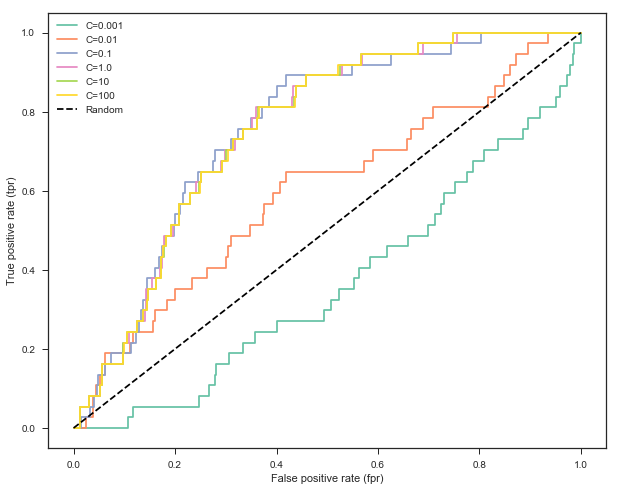

In [15]:
from sklearn.model_selection import cross_val_score

#Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, test_size=0.2)

# Fit a logistic regression model
for c in [0.001, 0.01, 0.1, 1.0, 10, 100]:
    model = LogisticRegression(C=c)
    model.fit(X_train, Y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="C=%s" % c)
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)
plt.show()


### AUC: Summarizing the Quality of Rankings
Very often, we want a single number that we can use to summarize the performance of a predictive model. Area under the receiver operating characteristic curve (AUC) provides a convenient way to do this. As the name suggests, this metric measures the area between the ROC curve and the line, y=0. Better rankings tend towards the upper left, leading to more area under the curve. This metric ranges from 0 to 1, with 0.5 corresponding to a classifier that just makes random guesses. 

In [16]:
aucs = []
for c in [0.001, 0.01, 0.1, 1.0, 10, 100]:
    model = LogisticRegression(C=c)
    model.fit(X_train, Y_train)
    
    probas = model.predict_proba(X_test)[:, 1]
    auc = metrics.roc_auc_score(Y_test, probas)
    
    aucs.append({"C":c, "AUC":auc})

# "pretty print" these
auc_df = pd.DataFrame(aucs).set_index("C")
auc_df

,AUC
C,
0.001,0.363253
0.010,0.596862
0.100,0.755588
1.000,0.754809
10.000,0.754277
100.000,0.754206


### Other measures: Cumulative response and lift curves
The interpretation of an ROC curve is not be entirely intuitive to business stakeholders. In many applications the **cumulative response curve** is more appropriate.  


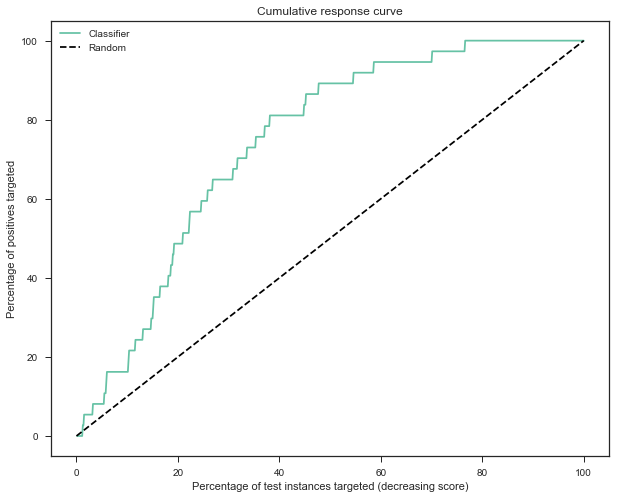

In [17]:
# Fit a logistic regression model
model = LogisticRegression(C=1.0)
model.fit(X_train, Y_train)

# Get the predicted value and the probability of Y_test records being = 1
Y_test_predicted = model.predict(X_test)
Y_test_probability = model.predict_proba(X_test)[:, 1]

# Sort these predictions, probabilities, and the true value in descending order of probability
order = np.argsort(Y_test_probability)[::-1]
Y_test_predicted_sorted = Y_test_predicted[order]
Y_test_sorted = np.array(Y_test)[order]

total_test_positives = Y_test.sum()

y_cumulative = Y_test_sorted.cumsum()*100/float(total_test_positives)
x_cumulative = np.linspace(1, len(y_cumulative), len(y_cumulative))*100/len(y_cumulative)


# Plot
plt.plot(x_cumulative, y_cumulative, label="Classifier")
plt.plot([0,100], [0,100], 'k--', label="Random")
plt.xlabel("Percentage of test instances targeted (decreasing score)")
plt.ylabel("Percentage of positives targeted")
plt.title("Cumulative response curve")
plt.legend()
plt.show()

We can also easily plot a **lift curve** in this scenario. Recall that the lift curve is created by dividing the cumulative response by the diagonal (y = x)

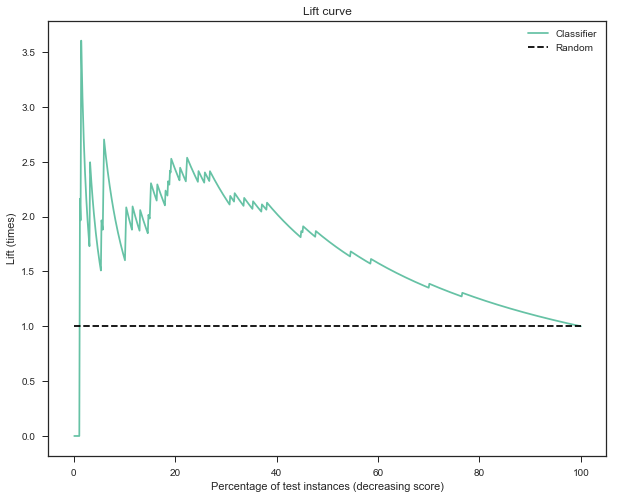

In [18]:
# divide by x
y_lift = y_cumulative/x_cumulative

plt.plot(x_cumulative, y_lift, label="Classifier")
plt.plot([0,100], [1,1], 'k--', label="Random")
plt.xlabel("Percentage of test instances (decreasing score)")
plt.ylabel("Lift (times)")
plt.title("Lift curve")
plt.legend()
plt.show()

Now ... Let's revisit our **mailing dataset** compare the cumulative response curves and then the lift curves of two models (a logistic regression model and a tree).

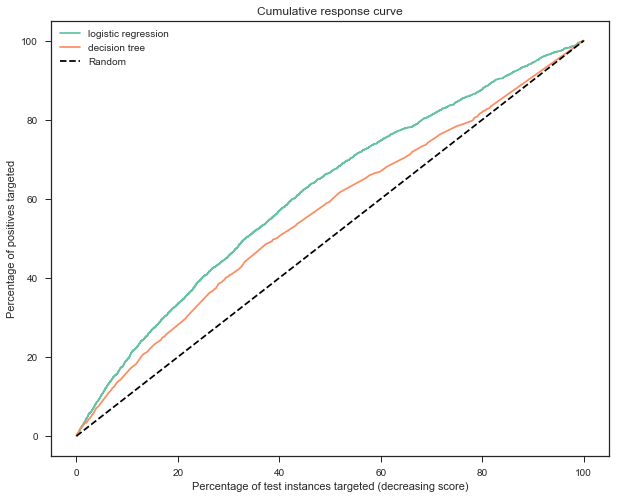

In [19]:
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, Y_train, Y_test = X_mailing_train, X_mailing_test, Y_mailing_train, Y_mailing_test


# Keep track of all output with the name of the models
xs = {}
ys = {}
models = [("logistic regression", LogisticRegression(C=1000000)),
          ("decision tree", DecisionTreeClassifier(criterion="entropy", max_depth=15))]


for model_type, model in models:
    model.fit(X_train, Y_train)

    Y_test_predicted = model.predict(X_test)
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    # How many users are above the current threshold?
    n_targeted = []
    for t in thresholds:
        n_targeted.append(np.sum(Y_test_probability_1 >= t))

    # Turn these counts to percentages of users above the threshold
    n_targeted = np.array(n_targeted)/float(len(Y_test))

    # Store
    xs[model_type] = n_targeted * 100
    ys[model_type] = tpr * 100
    
    plt.plot(n_targeted * 100, tpr * 100, label=model_type)
plt.plot([0,100], [0,100], 'k--', label="Random")
plt.xlabel("Percentage of test instances targeted (decreasing score)")
plt.ylabel("Percentage of positives targeted")
plt.title("Cumulative response curve")
plt.legend(loc=2)
plt.show()

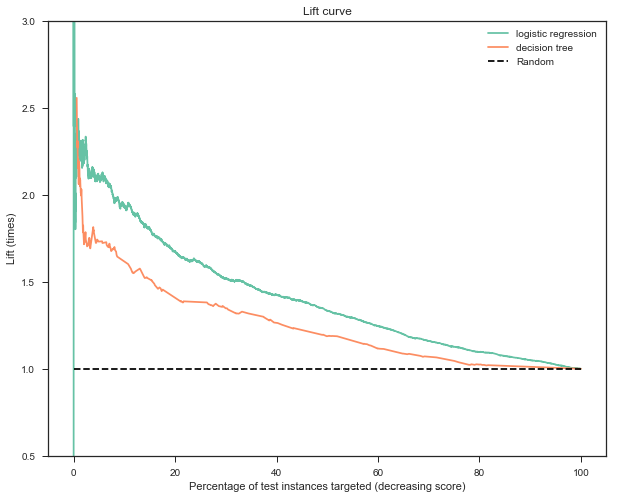

In [20]:

for model_type, model in models:    
    # Previously computed: n_targeted * 100
    x_lift = xs[model_type][1:]
    # Previously computed: tpr * 100
    y_lift = ys[model_type][1:]/x_lift
    plt.plot(x_lift, y_lift, label=model_type)

plt.plot([0,100], [1,1], 'k--', label="Random")
plt.xlabel("Percentage of test instances targeted (decreasing score)")
plt.ylabel("Lift (times)")
plt.title("Lift curve")
plt.legend()
plt.ylim([.5,3])
plt.show()

***
What if we want to understand not just lift, but how much benefit we are going to receive from a certain investment in targeting?  We can plot a profit curve.
***

### Profit curves
Let's look at the profit for various decision thresholds. Recall the 17/-1 benefit/cost from earlier.


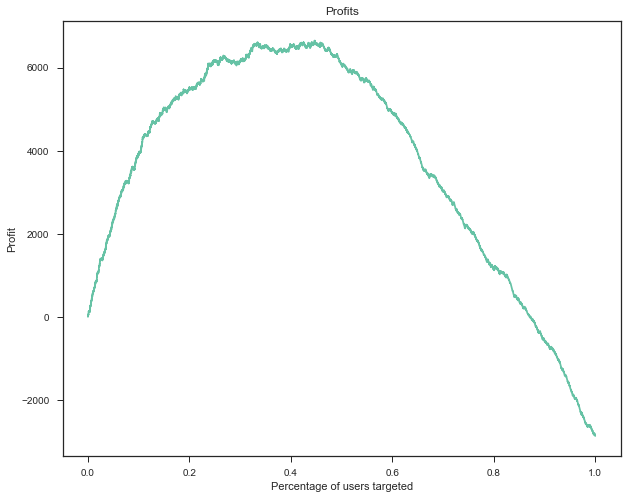

In [21]:
X_train, X_test, Y_train, Y_test = X_mailing_train, X_mailing_test, Y_mailing_train, Y_mailing_test

# Make and fit a model on the training data
model = LogisticRegression(C=1000000)
model.fit(X_train, Y_train)

# Get the false positive rate, true positive rate, and all thresholds
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])

size_targeted_pop = float(len(Y_test))

# What is the baseline probability of being positive or negative in the data set?
p_p = Y_test.sum()/float(len(Y_test))
p_n = 1 - Y_test.sum()/float(len(Y_test))

Y_test_predicted = model.predict(X_test)
Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

# How many users are above the current threshold?
n_targeted = []
for t in thresholds:
    n_targeted.append(np.sum(Y_test_probability_1 >= t))

# Turn these counts to percentages of users above the threshold
n_targeted = np.array(n_targeted)/float(len(Y_test))

# Expected profits:  
expected_profits = (cost_benefit_matrix[0, 0]*(tpr*p_p)) + (cost_benefit_matrix[0, 1]*(fpr*p_n))

# Plot the profit curve
plt.plot(n_targeted, size_targeted_pop*expected_profits)
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profits")
plt.show()